# Importing libraries

In [43]:
#!pip install mlflow

In [44]:
import mlflow
import os

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [45]:
mlflow.set_experiment("Loan_Status_Experiment")

Traceback (most recent call last):
  File "/Users/shivam13juna/Documents/virtual_envs/appy/lib/python3.9/site-packages/mlflow/store/tracking/file_store.py", line 317, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
  File "/Users/shivam13juna/Documents/virtual_envs/appy/lib/python3.9/site-packages/mlflow/store/tracking/file_store.py", line 410, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
  File "/Users/shivam13juna/Documents/virtual_envs/appy/lib/python3.9/site-packages/mlflow/store/tracking/file_store.py", line 1341, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "/Users/shivam13juna/Documents/virtual_envs/appy/lib/python3.9/site-packages/mlflow/store/tracking/file_store.py", line 1334, in _read_helper
    result = read_yaml(root, file_name)
  File "/Users/shivam13juna/Documents/virtual_envs/appy/lib/python3.9/site-packages/mlflow/utils/file_utils.py", line 309, in 

<Experiment: artifact_location='file:///Users/shivam13juna/Documents/scaler/mlops/sep_2025/dsml-mlops-sep-2025/session_9_mlflow/mlruns/968527100310716961', creation_time=1760667161711, experiment_id='968527100310716961', last_update_time=1760667161711, lifecycle_stage='active', name='Loan_Status_Experiment', tags={'mlflow.experimentKind': 'custom_model_development'}>

# Importing data sets

In [46]:
train_df = pd.read_csv('data.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [47]:
# let's binary encode, Gender, Married Loan_Status

train_df['Gender'] = train_df['Gender'].map({'Male': 0, 'Female': 1})
train_df['Married'] = train_df['Married'].map({'No': 0, 'Yes': 1})
train_df['Loan_Status'] = train_df['Loan_Status'].map({'N': 0, 'Y': 1})

In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 62.5+ KB


In [49]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [50]:
## dropping all the missing values
train_df = train_df.dropna()
train_df.isnull().sum()


# Don't drop features off data off in production.

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Let's create simple features

In [51]:
feature_columns = ['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History']
X = train_df[feature_columns]
y = train_df.Loan_Status


In [52]:
#mlflow.log_param, mlflow.log_metric, mlflow.sklearn.log_model
mlflow.log_param("feature_columns", feature_columns)


X.shape, y.shape

((480, 7), (480,))

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

# Let's begin model training

In [54]:
from sklearn.ensemble import RandomForestClassifier

depth = 6
criteria = 'gini'
n_esti = 1000

mlflow.log_param("max_depth", depth)
mlflow.log_param("criterion", criteria)
mlflow.log_param("n_estimators", n_esti)
#mlflow.log_param("model_name", "RandomForestClassifier")
mlflow.log_param("model_name", "XgboostClassifier")

#mlflow.log_params({
#	"max_depth": depth,
#	"criterion": criteria,
#	"n_estimators": n_esti
#})

#model = RandomForestClassifier(max_depth=depth, random_state=5, criterion=criteria, n_estimators=n_esti)
#model.fit(X_train, y_train)

import xgboost as xgb
model = xgb.XGBClassifier(max_depth=depth, random_state=5, n_estimators=n_esti, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=5,
              reg_alpha=0, reg_lambda=1, ...)

In [55]:
from sklearn.metrics import accuracy_score

pred_val = model.predict(X_val)
val_acc_score = accuracy_score(y_val, pred_val)

print(f"Training Accuracy: {model.score(X_train, y_train)}, Validation Accuracy: {val_acc_score}")

mlflow.log_metric("train_accuracy", model.score(X_train, y_train))
mlflow.log_metric("val_accuracy", val_acc_score)

Training Accuracy: 1.0, Validation Accuracy: 0.71875


In [56]:
mlflow.end_run()

# Different ways to use ML Flow

In [ ]:

#with mlflow.start_run():
#	# train a random forest model

#    max_depth = 7
#    model = RandomForestClassifier(max_depth=max_depth, random_state=42)

#    model.fit(X_train, y_train)

#    mlflow.log_param("max_depth", max_depth)

#    mlflow.log_param("feature_columns", feature_columns)

#    from sklearn.metrics import accuracy_score

#    pred_val = model.predict(X_val)
#    val_accuracy = accuracy_score(y_val, pred_val)

#    mlflow.log_metric("val_accuracy", val_accuracy)

#    pred_train = model.predict(X_train)
#    train_acc = accuracy_score(y_train, pred_train)

#    mlflow.log_metric("train_accuracy", train_acc)


# Another efficient way to use MLflow

In [ ]:
def mlflow_runs(n_est,max_dep,i):
    with mlflow.start_run():

        model_rf = RandomForestClassifier(n_estimators=n_est, max_depth=max_dep, random_state=5)
        model_rf.fit(X_train, y_train)

        pred_val = model_rf.predict(X_val)
        val_acc=accuracy_score(y_val, pred_val)

        pred_train = model_rf.predict(X_train)
        train_acc=accuracy_score(y_train, pred_train)

        run="hyperparameter_run_"+str(i)
        mlflow.set_tag('mlflow.runName',run)
        mlflow.log_param('n_estimators',n_est)
        mlflow.log_param('max_depth',max_dep)
        mlflow.log_param('model_name','RandomForestClassifier')
        mlflow.log_metric('val_acc',val_acc)
        mlflow.log_metric('train_acc',train_acc)
        mlflow.set_tag('data file','data_new.csv')

        mlflow.sklearn.log_model(model_rf, "model")


mlflow_runs(10,2,1)
mlflow_runs(20,2,2)
mlflow_runs(40,2,3)
mlflow_runs(10,4,4)
mlflow_runs(20,4,5)
mlflow_runs(40,4,6)
mlflow_runs(10,8,7)
mlflow_runs(20,8,8)
mlflow_runs(40,8,9)

# Let's see how we can store a confusion matrix picture in MLflow.

2025/10/17 08:09:38 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


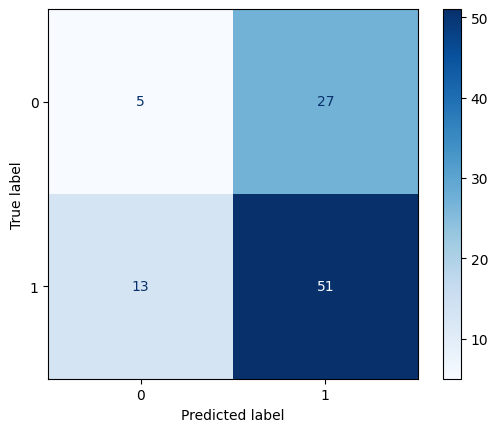

In [57]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import joblib


with mlflow.start_run():
	knn_model= KNeighborsClassifier(n_neighbors=5)
	knn_model.fit(X_train, y_train)

	pred_val = knn_model.predict(X_val)
	val_acc=accuracy_score(y_val, pred_val)

	pred_train = knn_model.predict(X_train)
	train_acc=accuracy_score(y_train, pred_train)

	run="KNN"
	mlflow.set_tag('mlflow.runName',run)
	mlflow.log_param('neighbors',5)
	mlflow.log_metric('val_acc',val_acc)
	mlflow.log_metric('train_acc',train_acc)
	mlflow.log_param('model_name','KNeighborsClassifier')

	cm=ConfusionMatrixDisplay.from_predictions( y_val,pred_val, cmap='Blues')
	cm.figure_.savefig('confusion_mat.png')
	mlflow.log_artifact('confusion_mat.png') # log_artifact can be used to log any file, of any format, e.g. images, text files, etc, with max-size of 5 GB. 

	# save dataframe as artifact

	mlflow.log_artifact('data.csv')

	mlflow.sklearn.log_model(knn_model, "model_knn")

	joblib.dump(knn_model, 'knn_model.joblib')
	mlflow.log_artifact('knn_model.joblib')